# TP2: Propagación de Fake News y su impacto en la afinidad política de una sociedad utilizando la herramienta cell-DEVS

Integrantes: Amalia Sorondo ; Mariana Bergonzi.

Materia: Simulación de Eventos Discretos. 

## Descripción del modelo

Este modelo surge de la pregunta: ¿Cómo influye la propagación de fake news en la afinidad política de las personas?
Para intentar responderla decidimos realizar un modelo mediante el cual representamos una dinámica simplificada de la propagación de una noticia falsa en diversos grupos sociales y cómo ésta puede modificar el pensamiento o afinidad politica hacia un determinado partido político en cada grupo social.


Este segundo trabajo práctico toma la misma pregunta que el anterior pero modelando las poblaciones utilizando un atómico cell-DEVS.
El generador de fake news enviará las noticias a determinadas poblaciones, representadas por las celdas del atómico cell-DEVS y éstas que comenzarán la cadena de difusión gracias a las reglas que definiremos.

Nuestro objetivo será analizar la evolución de la afinidad política de las poblaciones en el tiempo al recibir distintas fake news y cómo ésta se modifica al definir distintas celdas como las receptoras de las fakes.

## Modelo conceptual 


El modelo cuenta con diferentes hipótesis:

    - Sólo consideramos dos bandos políticos: oficialismo y oposición
    - Las fakenews atacan a uno de los dos bandos políticos

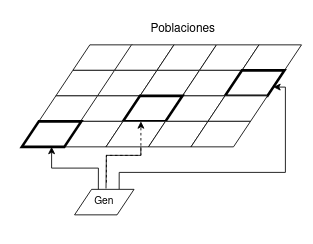

In [164]:
from IPython import display
display.Image("./model.png")

El modelo contará con un generador de fake news y con 16 poblaciones de diferentes características representadas por las celdas del atómico cell-DEVS.

Cada población contará con las siguientes características que servirán para definir cómo evoluciona la afinidad política de éstas.

    - Edad
    - Estudios universitarios completos
    - Nivel de involucramiento político
    - Estado laboral
    - Nivel económico
    
Además, cuentan con un trait dinámico que representa la afinidad política. 

De esta manera proponemos otras hipótesis que regirán el comportamiento de cada población ante una fake news:

- Es más probable creer en una fake news recibida del generador si:
    - No fuiste a la universidad
    - Estás en algún extremo socioeconómico
    - Tu estado laboral es precario
    - Tu involucramiento en la política es bajo
    - Coincidencia entre la afinidad política de la fake y la de la población receptora
        - [REVISAR] "Existe" Coincidencia
    - La fake news trata un tema urgente

- Es más probable creer en una fake news recibida de otra población si:
    - Se comparte una mayor cantidad de traits con la población de la que se recibe la fake news
    - La creencia de la población emisora en la fake news es alta 
    - Coincidencia del bando político de la fake news con la afinidad política de la población receptora


La centralidad de una población se define por su ubicación en el atómico Cell-DEVS: las poblaciones ubicadas en los extremos difundirán menos su creencia en la fake que aquellas que se encuentran en las celdas centrales.

## Descripción de los atómicos y acoplados

### Atómico: Generador
Cada fake news que emite el generador tiene la siguiente información: 

    - ID de la fake
    - Afinidad al gobierno: 0/1 (0 = afin oposición , 1= afin oficialismo)
    - Urgencia de la noticia: valor real [0,1]
    - Credibilidad: valor real [0,1]
    

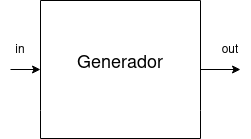

In [2]:
from IPython import display
display.Image("./generador.png")

#### Especificación formal del Generador


 GENERATOR = < S, X, Y, delta int ,delta ext , lamba, ta >

En donde: 

* S= {active,passive}

* X= {stop}

* Y= {out}

* delta int(active) = active

* delta ext(S,e,stop) = passive

* lamba(active) = out

* ta= frequency

[REVISAR] Usar guion bajo en delta_int y delta_ext. Pones mas explícito que estructura tiene el elemento "out" que emite en la salida.

### Atómico Cell-DEVS: Poblaciones
[REVISAR] "Atómico Cell-DEVS" suena raro porque Cell-DEVS es un acoplado por definición. Sugiero "Variables de estado de las Celdas en Cell-DEVS" o algo así.

Cada celda del atómico cell-DEVS estará constituida por una tupla que representa el estado de la población, sus componentes serán las siguientes:

    - ID de la última fake que escuchó 
    - Partido atacado por la última fake que escuchó
    - Estado de emisión de la población (1 si está emitiendo, 0 si no)
    - Valor de creencia en la última fake que escuchó
    - Afinidad política actual
    - Edad
    - Estudios universitarios completos
    - Nivel de involucramiento político
    - Estado laboral
    - Nivel económico
    - ID de la población
[REVISION] Enumerar las posiciones de cada valor en la tupla.
    
El modelo cell-DEVS tiene: 

    - Tamaño: 4 x 4
    - Bordes: _nowrapped_
    - Retardo: _transporte_


#### Valor inicial de las celdas

En los archivos popul.val y popul2.val definimos los valores iniciales de las celdas.

La elección de uno de estos archivos dependerá del escenario del experimento, ya que buscaremos experimentar con poblaciones que presentan distintas proporciones de cada característica.

In [1]:
%%bash -s "$CDPP_EXAMPLES_CELL"

cd ../model

cat popul.val

(0,0) = [0.0,0.0,0.0,0.0,0.0,45.0,1.0,0.1,0.6,0.4,1]
(0,1) = [0.0,0.0,0.0,0.0,0.2,20.0,1.0,0.9,0.8,0.5,2]
(0,2) = [0.0,0.0,0.0,0.0,0.45,30.0,1.0,0.4,0.4,0.8,3]
(0,3) = [0.0,0.0,0.0,0.0,0.7,65.0,0.0,0.2,0.3,0.3,4]
(1,0) = [0.0,0.0,0.0,0.0,0.1,55.0,1.0,0.5,0.6,0.7,5]
(1,1) = [0.0,0.0,0.0,0.0,0.3,35.0,1.0,0.6,0.7,0.9,6]
(1,2) = [0.0,0.0,0.0,0.0,0.6,18.0,0.0,0.15,0.2,0.3,7]
(1,3) = [0.0,0.0,0.0,0.0,0.8,40.0,1.0,0.8,0.7,0.6,8]
(2,0) = [0.0,0.0,0.0,0.0,0.2,70.0,0.0,0.2,0.1,0.8,9]
(2,1) = [0.0,0.0,0.0,0.0,0.4,50.0,1.0,0.4,0.5,0.4,10]
(2,2) = [0.0,0.0,0.0,0.0,0.7,36.0,0.0,0.9,0.2,0.3,11]
(2,3) = [0.0,0.0,0.0,0.0,0.9,21.0,0.0,0.6,0.4,0.5,12]
(3,0) = [0.0,0.0,0.0,0.0,0.3,28.0,1.0,0.35,0.6,0.7,13]
(3,1) = [0.0,0.0,0.0,0.0,0.55,43.0,0.0,0.8,0.4,0.2,14]
(3,2) = [0.0,0.0,0.0,0.0,0.8,75.0,0.0,0.2,0.8,0.7,15]
(3,3) = [0.0,0.0,0.0,0.0,1.0,37.0,1.0,0.75,0.8,0.6,16]


#### Vecindario

Para la propagación de las fake news dentro de la sociedad, utilizaremos el vecindario de von Neumann.

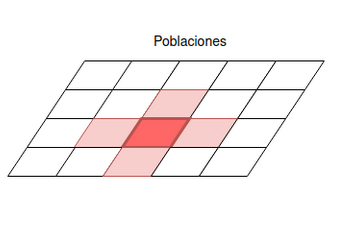

In [4]:
from IPython import display
display.Image("./vecindario.png")

#### Macros

Las siguientes macros son utilizadas para calcular las _shared_traits_proportions_ esto es, la cantidad de características compartidas con una celda vecina.
Este valor será utilizado para determinar cuánto la afinidad política de una población se verá afectada por la creencia en una fake por parte de una población vecina.

Este valor se obtiene a partir de la misma cuenta utilizada en el trabajo anterior:

		Real shared_traits_proportion = Real(1) - ((abs( (age - sender_age).value()) + 
										abs( (university_studies - sender_university_studies).value()) + 
										abs((political_involvement - sender_political_involvement).value()) +
										abs((employment_status - sender_employment_status).value()) +
										abs((economic_status - sender_economic_status).value())) / 5);


Como no fue posible parametrizar la macro en función de la celda vecina creamos cuatro macros de _shared_traits_proportions_, una por cada vecino.

[REVISION] "Como en Cell-DEVS no es posible parametrizar las macros"...

--------------------------------------------------------

#BeginMacro(shared_traits_proportion_arriba)

(1.0 +(-1) * (abs((0,-1)!4+(-1) * (0,0)!4)+abs((0,-1)!5+(-1) * (0,0)!5)+abs((0,-1)!6+(-1) * (0,0)!6)+abs((0,-1)!7+(-1) * (0,0)!7)+abs(((0,-1)!8+(-1) * (0,0)!8)))/5.0)

#EndMacro

--------------------------------------------------------

#BeginMacro(shared_traits_proportion_abajo)

(1.0+(-1) * (abs((0,1)!4+(-1) * (0,0)!4)+abs((0,1)!5+(-1) * (0,0)!5)+abs((0,1)!6+(-1) * (0,0)!6)+abs((0,1)!7+(-1) * (0,0)!7)+abs((0,1)!8+(-1) * (0,0)!8))/5.0)

#EndMacro

--------------------------------------------------------

#BeginMacro(shared_traits_proportion_izq)

(1.0+(-1) * (abs((-1,0)!4+(-1) * (0,0)!4)+abs((-1,0)!5+(-1) * (0,0)!5)+abs((-1,0)!6+(-1) * (0,0)!6)+abs((-1,0)!7+(-1) * (0,0)!7)+abs((-1,0)!8+(-1) * (0,0)!8))/5.0)

#EndMacro

--------------------------------------------------------

#BeginMacro(shared_traits_proportion_der)

(1.0+(-1) * (abs((1,0)!4+(-1) * (0,0)!4)+abs((1,0)!5+(-1) * (0,0)!5)+abs((1,0)!6+(-1) * (0,0)!6)+abs((1,0)!7+(-1) * (0,0)!7)+abs((1,0)!8+(-1) * (0,0)!8))/5.0)

#EndMacro

--------------------------------------------------------



<br>
<br>

También definimos la macro _media_belief_ para calcular la creencia de una población a una fake que viene del generador:

[REVISION] Tiene pinta de que le asignan pesos de importancia a la info que viene del generador. Es así? lo pueden explicar en palabras?

--------------------------------------------------------


#BeginMacro(media_belief)

(abs((0,0)!4 +(-1) * portValue(in)!1)) * 0.35 + (1 +(-1) * (0,0)!6)* 0.125 + (1 +(-1) * abs((0,0)!9 +(-1)* 0.5)) * 0.125 + (1 +(-1) * (0,0)!8) * 0.125 + (1 +(-1) * (0,0)!7) * 0.125 + portValue(in)!2 * 0.1 + portValue(in)!3 * 0.05 

#EndMacro

--------------------------------------------------------

<br>

#### Reglas de recepción de la fake por los puertos de entrada

Para definir las reglas que modificarán el valor de una celda al recibir una fake por el puerto de entrada definimos las reglas _news_:

portInTransition : in@population(1,1) news

[news]

La cuenta utilizada para calcular la nueva afinidad política a partir de una fake es equivalente a aquella utilizada en el trabajo práctico anterior, ésta se encontraba en la outputFunction del atómico Population:

		int multiplicative_factor = attacked_party == 1 ? 1 : (-1); // para saber si restar o sumar -> acercarse al partido 0 o 1
		political_affinity = political_affinity + multiplicative_factor * current_fake_belief.value() * 0.0175; 

* **Regla 1**

Si el ID de la fake que entra por el puerto de entrada es estrictamente mayor al ID de la última fake que escuchó la población y si la afinidad política de la población luego de escuchar la fake por el medio se vuelve inferior a 0, entonces se setean los valores de la tupla de la siguiente forma: el ID de la última fake escuchada será el nuevo ID (0), el partido atacado por será aquel de la nueva fake (1), la población pasa a estar en estado "emitiendo" (2), se calcula la creencia a la nueva fake (3), la afinidad política será 0 ya que no puede ser negativa(4), los demás componentes de la tupla se mantienen ya que representan las características de la población.

[REVISION] Los paréntesis denotan posición en la tupla, no? Si Es así usen esa misma notación en la presentación de la tupla mas arriba.

```
rule: { [ portValue(in)!0, portValue(in)!1, 1, #macro(media_belief), 0 , (0,0)!5 , (0,0)!6 , (0,0)!7 , (0,0)!8 , (0,0)!9 , (0,0)!10 ] } 0 { portValue(in)!0 > (0,0)!0 and ((0,0)!4+ (-1 * (1+(-1) * portValue(in)!1) + portValue(in)!1) * #macro(media_belief) * 0.0175) < 0 } 
```

* **Regla 2**

Si el ID de la fake que entra por el puerto de entrada es estrictamente mayor al ID de la última fake que escuchó la población y si la afinidad política de la población luego de escuchar la fake por el medio se vuelve superior a 1, entonces se setean los valores de la tupla de la siguiente forma: el ID de la última fake escuchada será el nuevo ID (0), el partido atacado por será aquel de la nueva fake (1), la población pasa a estar en estado "emitiendo" (2), se calcula la creencia a la nueva fake (3), la afinidad política será 1 ya que no puede ser mayor a 1 (4), los demás componentes de la tupla se mantienen ya que representan las características de la población.

```
rule: { [ portValue(in)!0, portValue(in)!1, 1, #macro(media_belief), 1 , (0,0)!5 , (0,0)!6 , (0,0)!7 , (0,0)!8 , (0,0)!9 , (0,0)!10 ] } 0 { portValue(in)!0 > (0,0)!0 and ((0,0)!4+ (-1 * (1+(-1) * portValue(in)!1) + portValue(in)!1) * #macro(media_belief) * 0.0175) > 1 } 
```

* **Regla 3**

Si el ID de la fake que entra por el puerto de entrada es estrictamente mayor al ID de la última fake que escuchó la población y si la afinidad política de la población luego de escuchar la fake por el medio se mantiene en el rango [0,1], entonces se setean los valores de la tupla de la siguiente forma: el ID de la última fake escuchada será el nuevo ID (0), el partido atacado por será aquel de la nueva fake (1), la población pasa a estar en estado "emitiendo" (2), se calcula la creencia a la nueva fake (3), la afinidad política será la calculada (4), los demás componentes de la tupla se mantienen ya que representan las características de la población.

[REVISION] En todas las reglas les quedó "el partido atacado por será"... Creo que sería "atacado por la fake"?

```
rule: { [ portValue(in)!0, portValue(in)!1, 1, #macro(media_belief), (0,0)!4+ (-1 * (1+(-1) * portValue(in)!1) + portValue(in)!1) * #macro(media_belief) * 0.0175, (0,0)!5 , (0,0)!6 , (0,0)!7 , (0,0)!8 , (0,0)!9 , (0,0)!10 ] } 0 { portValue(in)!0 > (0,0)!0 and ((0,0)!4+ (-1 * (1+(-1) * portValue(in)!1) + portValue(in)!1) * #macro(media_belief) * 0.0175)>=0 and ((0,0)!4+ (-1 * (1+(-1) * portValue(in)!1) + portValue(in)!1) * #macro(media_belief) * 0.0175) <= 1 } 
```

* **Regla default**:

```
rule : {(0,0)} 0 {t}
```

[REVISION] No entiendo como manejaron el delay. Están todos en cero. Está bien eso? En los archivos .ma sin embargo las reglas tienen un delays diferentes (2, 3, 4...) y no veo que esté explicado el motivo por el momento. Habría que comentarlo en algún lado.

#### Reglas de propagación entre celdas vecinas

La creencia de una población en una fake se basa en la siguiente cuenta que es una modificación de la utilizada en el trabajo anterior:

[REVISION] Cuando se refieran a modelos del trabajo anterior y pongan código traten de orientar en el texto hacia cual atómico y función del mismo se refieren

		Real belief =   (sender_fake_belief * 0.225 +
						shared_traits_proportion * 0.225 +
						(Real(1) - abs((political_affinity - sender_political_affinity).value()) ) * 0.5)*0.55;
                        
Luego, la afinidad política se actualiza de la misma forma que en el conjunto de reglas anterior: 

[REVISION] Acá dice "conjutno de reglas anterior". Se refiere a "rules" de Cell-DEVS o a estos extractos de código?

		int multiplicative_factor = attacked_party == 1 ? 1 : (-1); // para saber si restar o sumar -> acercarse al partido 0 o 1
		political_affinity = political_affinity + multiplicative_factor * belief * 0.0175;
                        

Definimos reglas para cada vecino y para los distintos casos: la afinidad política actualizada está en el rango [0,1], supera el valor 1 o es menor a 0.

Fue necesario agregar estos tres casos para que la afinidad política de las poblaciones se mantuviera en el rango.

En cada regla se verifica si la celda vecina está en estado "emitiendo" y si el ID de la fake que emite es estrictamente superior al de la celda actual. En este caso se modifica el estado a "emitiendo", se actualizan las componentes de la tupla correspondientes a la última fake escuchada y se actualiza el valor de la afinidad política.

Las siguientes 3 reglas definen el comportamiento cuando la celda de arriba está emitiendo una fake:

* **Regla 4**
```
rule : {[(0,-1)!0, (0,-1)!1, 1.0, (((0,-1)!2 * 0.225 + (#macro(shared_traits_proportion_arriba)) * 0.225+(1+(-1) * abs((0,0)!3 +(-1) * (0,-1)!3)) * 0.5) * 0.55), 0, (0,0)!5, (0,0)!6, (0,0)!7, (0,0)!8, (0,0)!9, (0,0)!10]} 2 {((0,-1)!0) >((0,0)!0) and ((0,-1)!2)=1 and ((0,0)!2)=0 and (((0,0)!4)+(-1 * (1+(-1) * (0,-1)!1 + (0,-1)!1)) * (((0,-1)!2 * 0.225 + (#macro(shared_traits_proportion_arriba)) * 0.225+(1+(-1) * abs((0,0)!3 +(-1)* (0,-1)!3)) * 0.5) * 0.55) * 0.0175) < 0} 
```


* **Regla 5**
```
rule : {[(0,-1)!0 , (0,-1)!1 , 1.0 , (((0,-1)!2 * 0.225 + ( #macro(shared_traits_proportion_arriba)) * 0.225+(1+(-1) * abs((0,0)!3 +(-1) *  (0,-1)!3)) * *0.5) * 0.55) , 1 , (0,0)!5 , (0,0)!6 , (0,0)!7 , (0,0)!8 , (0,0)!9 , (0,0)!10]} 2 {((0,-1)!0) >((0,0)!0) and ((0,-1)!2)=1 and ((0,0)!2)=0 and (((0,0)!4)+(-1 * (1+(-1) * (0,-1)!1 + (0,-1)!1)) * (((0,-1)!2 * 0.225 + ( #macro(shared_traits_proportion_arriba)) * 0.225+(1+(-1) * abs((0,0)!3 +(-1)* (0,-1)!3)) * 0.5) * 0.55) * 0.0175) >1}
```


* **Regla 6**
```
rule : {[(0,-1)!0 , (0,-1)!1 , 1.0 , (((0,-1)!2 * 0.225 + ( #macro(shared_traits_proportion_arriba)) * 0.225 + (1+(-1) * abs((0,0)!3 +(-1) * (0,-1)!3)) * 0.5) * 0.55) , ((0,0)!4) + (-1 * (1+(-1) * (0,-1)!1 + (0,-1)!1)) * (((0,-1)!2 * 0.225 + ( #macro(shared_traits_proportion_arriba)) * 0.225 + (1+(-1) * abs((0,0)!3 +(-1) * (0,-1)!3)) * 0.5) * 0.55) * 0.0175, (0,0)!5 , (0,0)!6 , (0,0)!7 , (0,0)!8 , (0,0)!9 , (0,0)!10] } 2 { ((0,-1)!0) > ((0,0)!0) and ((0,-1)!2)=1 and ((0,0)!2)=0 and (((0,0)!4)+(-1 * (1+(-1) * (0,-1)!1 + (0,-1)!1)) * (((0,-1)!2 * 0.225 + ( #macro(shared_traits_proportion_arriba)) * 0.225+(1+(-1) * abs((0,0)!3 +(-1) * (0,-1)!3)) * 0.5) * 0.55) * 0.0175) >= 0 and (((0,0)!4)+(-1 * (1+(-1) * (0,-1)!1 + (0,-1)!1)) * (((0,-1)!2 * 0.225 + ( #macro(shared_traits_proportion_arriba)) * 0.225 + (1+(-1) * abs((0,0)!3 +(-1) * (0,-1)!3)) * 0.5) * 0.55) * 0.0175) <= 1} 
```


Las siguientes 3 reglas definen el comportamiento cuando la celda de abajo está emitiendo una fake:

* **Regla 7**
```
rule : {[(0,1)!0,(0,1)!1, 1,(((0,1)!2 * 0.225 + #macro(shared_traits_proportion_abajo)*0.225+ (1+(-1)* abs( (0,0)!3+(-1)* (0,1)!3))*0.5)*0.55) ,0,(0,0)!5,(0,0)!6,(0,0)!7,(0,0)!8,(0,0)!9,(0,0)!10]} 2 {(0,1)!0>(0,0)!0 and (0,1)!2=1 and (0,0)!2=0 and (((0,0)!4)+(-1*(1+(-1)*(0,1)!1 + (0,1)!1))*(((0,1)!2*0.225+(#macro(shared_traits_proportion_abajo))*0.225+(1+(-1)*abs((0,0)!3 +(-1)* (0,1)!3))*0.5)*0.55)*0.0175)<0 } 
```


* **Regla 8**
```
rule : {[(0,1)!0,(0,1)!1, 1,(((0,1)!2 * 0.225 + #macro(shared_traits_proportion_abajo)*0.225+ (1+(-1)* abs( (0,0)!3+(-1)* (0,1)!3))*0.5)*0.55) ,1,(0,0)!5,(0,0)!6,(0,0)!7,(0,0)!8,(0,0)!9,(0,0)!10]} 2 {(0,1)!0>(0,0)!0 and (0,1)!2=1 and (0,0)!2=0 and (((0,0)!4)+(-1*(1+(-1)*(0,1)!1 + (0,1)!1))*(((0,1)!2*0.225+(#macro(shared_traits_proportion_abajo))*0.225+(1+(-1)*abs((0,0)!3 +(-1)* (0,1)!3))*0.5)*0.55)*0.0175)>1} 
```


* **Regla 9**
```
rule : {[(0,1)!0,(0,1)!1, 1,(((0,1)!2 * 0.225 + #macro(shared_traits_proportion_abajo)*0.225+ (1+(-1)* abs( (0,0)!3+(-1)* (0,1)!3))*0.5)*0.55) ,((0,0)!4)+(-1*(1+(-1)*(0,1)!1 + (0,1)!1))*(((0,1)!2*0.225+(#macro(shared_traits_proportion_abajo))*0.225+(1+(-1)*abs((0,0)!3 +(-1)* (0,1)!3))*0.5)*0.55)*0.0175,(0,0)!5,(0,0)!6,(0,0)!7,(0,0)!8,(0,0)!9,(0,0)!10]} 2 {(0,1)!0>(0,0)!0 and (0,1)!2=1 and (0,0)!2=0 and (((0,0)!4)+(-1*(1+(-1)*(0,1)!1 + (0,1)!1))*(((0,1)!2*0.225+(#macro(shared_traits_proportion_abajo))*0.225+(1+(-1)*abs((0,0)!3 +(-1)* (0,1)!3))*0.5)*0.55)*0.0175) >=0 and (((0,0)!4)+(-1*(1+(-1)*(0,1)!1 + (0,1)!1))*(((0,1)!2*0.225+(#macro(shared_traits_proportion_abajo))*0.225+(1+(-1)*abs((0,0)!3 +(-1)* (0,1)!3))*0.5)*0.55)*0.0175)<=1} 
```


Las siguientes 3 reglas definen el comportamiento cuando la celda derecha está emitiendo una fake:

* **Regla 10**
```
rule : {[(1,0)!0,(1,0)!1, 1,(((1,0)!2 * 0.225 + #macro(shared_traits_proportion_der)*0.225+ (1+(-1)* abs( (0,0)!3+(-1)* (1,0)!3))*0.5)*0.55) ,0,(0,0)!5,(0,0)!6,(0,0)!7,(0,0)!8,(0,0)!9,(0,0)!10]} 2 {(1,0)!0>(0,0)!0 and (1,0)!2=1 and (0,0)!2=0 and (((0,0)!4)+(-1*(1+(-1)*(1,0)!1 + (1,0)!1))*(((1,0)!2*0.225+(#macro(shared_traits_proportion_der))*0.225+(1+(-1)*abs((0,0)!3 +(-1)* (1,0)!3))*0.5)*0.55)*0.0175)<0} 
```
 


* **Regla 11**
```
rule : {[(1,0)!0,(1,0)!1, 1,(((1,0)!2 * 0.225 + #macro(shared_traits_proportion_der)*0.225+ (1+(-1)* abs( (0,0)!3+(-1)* (1,0)!3))*0.5)*0.55) ,1,(0,0)!5,(0,0)!6,(0,0)!7,(0,0)!8,(0,0)!9,(0,0)!10]} 2 {(1,0)!0>(0,0)!0 and (1,0)!2=1 and (0,0)!2=0 and (((0,0)!4)+(-1*(1+(-1)*(1,0)!1 + (1,0)!1))*(((1,0)!2*0.225+(#macro(shared_traits_proportion_der))*0.225+(1+(-1)*abs((0,0)!3 +(-1)* (1,0)!3))*0.5)*0.55)*0.0175)>1} 
```


* **Regla 12**
```
rule : {[(1,0)!0,(1,0)!1, 1,(((1,0)!2 * 0.225 + #macro(shared_traits_proportion_der)*0.225+ (1+(-1)* abs( (0,0)!3+(-1)* (1,0)!3))*0.5)*0.55) ,((0,0)!4)+(-1*(1+(-1)*(1,0)!1 + (1,0)!1))*(((1,0)!2*0.225+(#macro(shared_traits_proportion_der))*0.225+(1+(-1)*abs((0,0)!3 +(-1)* (1,0)!3))*0.5)*0.55)*0.0175,(0,0)!5,(0,0)!6,(0,0)!7,(0,0)!8,(0,0)!9,(0,0)!10]} 2 {(1,0)!0>(0,0)!0 and (1,0)!2=1 and (0,0)!2=0 and (((0,0)!4)+(-1*(1+(-1)*(1,0)!1 + (1,0)!1))*(((1,0)!2*0.225+(#macro(shared_traits_proportion_der))*0.225+(1+(-1)*abs((0,0)!3 +(-1)* (1,0)!3))*0.5)*0.55)*0.0175)>=0 and (((0,0)!4)+(-1*(1+(-1)*(1,0)!1 + (1,0)!1))*(((1,0)!2*0.225+(#macro(shared_traits_proportion_der))*0.225+(1+(-1)*abs((0,0)!3 +(-1)* (1,0)!3))*0.5)*0.55)*0.0175)<=1} 
```


Las siguientes 3 reglas definen el comportamiento cuando la celda izquierda está emitiendo una fake:

* **Regla 13**
```
rule : {[(-1,0)!0,(-1,0)!1, 1,(((-1,0)!2 * 0.225 + #macro(shared_traits_proportion_izq)*0.225+ (1+(-1)* abs( (0,0)!3+(-1)* (-1,0)!3))*0.5)*0.55),0,(0,0)!5,(0,0)!6,(0,0)!7,(0,0)!8,(0,0)!9,(0,0)!10]} 2 {(-1,0)!0>(0,0)!0 and (-1,0)!2=1 and (0,0)!2=0 and (((0,0)!4)+(-1*(1+(-1)*(-1,0)!1 + (-1,0)!1))*(((-1,0)!2*0.225+(#macro(shared_traits_proportion_izq))*0.225+(1+(-1)*abs((0,0)!3 +(-1)* (-1,0)!3))*0.5)*0.55)*0.0175)<0}
```


* **Regla 14**
```
rule : {[(-1,0)!0,(-1,0)!1, 1,(((-1,0)!2 * 0.225 + #macro(shared_traits_proportion_izq)*0.225+ (1+(-1)* abs( (0,0)!3+(-1)* (-1,0)!3))*0.5)*0.55),1,(0,0)!5,(0,0)!6,(0,0)!7,(0,0)!8,(0,0)!9,(0,0)!10]} 2 {(-1,0)!0>(0,0)!0 and (-1,0)!2=1 and (0,0)!2=0 and (((0,0)!4)+(-1*(1+(-1)*(-1,0)!1 + (-1,0)!1))*(((-1,0)!2*0.225+(#macro(shared_traits_proportion_izq))*0.225+(1+(-1)*abs((0,0)!3 +(-1)* (-1,0)!3))*0.5)*0.55)*0.0175)>1}
```


* **Regla 15**
```
rule : {[(-1,0)!0,(-1,0)!1, 1,(((-1,0)!2 * 0.225 + #macro(shared_traits_proportion_izq)*0.225+ (1+(-1)* abs( (0,0)!3+(-1)* (-1,0)!3))*0.5)*0.55),((0,0)!4)+(-1*(1+(-1)*(-1,0)!1 + (-1,0)!1))*(((-1,0)!2*0.225+(#macro(shared_traits_proportion_izq))*0.225+(1+(-1)*abs((0,0)!3 +(-1)* (-1,0)!3))*0.5)*0.55)*0.0175,(0,0)!5,(0,0)!6,(0,0)!7,(0,0)!8,(0,0)!9,(0,0)!10]} 2 {(-1,0)!0>(0,0)!0 and (-1,0)!2=1 and (0,0)!2=0 and (((0,0)!4)+(-1*(1+(-1)*(-1,0)!1 + (-1,0)!1))*(((-1,0)!2*0.225+(#macro(shared_traits_proportion_izq))*0.225+(1+(-1)*abs((0,0)!3 +(-1)* (-1,0)!3))*0.5)*0.55)*0.0175) >=0 and (((0,0)!4)+(-1*(1+(-1)*(-1,0)!1 + (-1,0)!1))*(((-1,0)!2*0.225+(#macro(shared_traits_proportion_izq))*0.225+(1+(-1)*abs((0,0)!3 +(-1)* (-1,0)!3))*0.5)*0.55)*0.0175)<=1}
```

#### Reglas para dejar de emitir una fake

Estas reglas se basan en que si se cumplen las siguientes condiciones: todos mis vecinos tienen el mismo o mayor ID que la celda actual y además la celda actual está en estado de "emitir"(1); entonces se pasa al estado "no emitir"(0) y se ponen en valor 0 los siguientes valores de la tupla: "attacked_party" y "current_belief".

% passivate celdas centrales
* **Regla 16**
```
rule : {[(0,0)!0, 0, 0, 0,(0,0)!4,(0,0)!5,(0,0)!6,(0,0)!7,(0,0)!8,(0,0)!9,(0,0)!10]} 10 {(-1,0)!0>=(0,0)!0 and (1,0)!0>=(0,0)!0 and (0,1)!0>=(0,0)!0 and (0,-1)!0>=(0,0)!0 and (0,0)!2=1}
```


% passivate celdas con 3 vecinos
* **Regla 17**
```
rule : {[(0,0)!0, 0, 0, 0,(0,0)!4,(0,0)!5,(0,0)!6,(0,0)!7,(0,0)!8,(0,0)!9,(0,0)!10]} 8 {(-1,0)=? and (1,0)!0>=(0,0)!0 and (0,1)!0>=(0,0)!0 and (0,-1)!0>=(0,0)!0 and (0,0)!2=1}
```


* **Regla 18**
```
rule : {[(0,0)!0, 0, 0, 0,(0,0)!4,(0,0)!5,(0,0)!6,(0,0)!7,(0,0)!8,(0,0)!9,(0,0)!10]} 8 {(1,0)=? and (-1,0)!0>=(0,0)!0 and (0,1)!0>=(0,0)!0 and (0,-1)!0>=(0,0)!0 and (0,0)!2=1}
```


* **Regla 19**
```
rule : {[(0,0)!0, 0, 0, 0,(0,0)!4,(0,0)!5,(0,0)!6,(0,0)!7,(0,0)!8,(0,0)!9,(0,0)!10]} 8 {(0,1)=? and (1,0)!0>=(0,0)!0 and (-1,0)!0>=(0,0)!0 and (0,-1)!0>=(0,0)!0 and (0,0)!2=1}
```


* **Regla 20**
```
rule : {[(0,0)!0, 0, 0, 0,(0,0)!4,(0,0)!5,(0,0)!6,(0,0)!7,(0,0)!8,(0,0)!9,(0,0)!10]} 8 {(0,-1)=? and (1,0)!0>=(0,0)!0 and (-1,0)!0>=(0,0)!0 and (0,1)!0>=(0,0)!0 and (0,0)!2=1}
```


* **Regla 21**
```
% passivate celdas esquinas
rule : {[(0,0)!0, 0, 0, 0,(0,0)!4,(0,0)!5,(0,0)!6,(0,0)!7,(0,0)!8,(0,0)!9,(0,0)!10]} 8 {(-1,0)=? and (0,-1)=? and (0,1)!0>=(0,0)!0 and (1,0)!0>=(0,0)!0 and (0,0)!2=1}
```


* **Regla 23**
```
rule : {[(0,0)!0, 0, 0, 0,(0,0)!4,(0,0)!5,(0,0)!6,(0,0)!7,(0,0)!8,(0,0)!9,(0,0)!10]} 8 {(1,0)=? and (0,-1)=? and (0,1)!0>=(0,0)!0 and (-1,0)!0>=(0,0)!0 and (0,0)!2=1}
```


* **Regla 24**
```
rule : {[(0,0)!0, 0, 0, 0,(0,0)!4,(0,0)!5,(0,0)!6,(0,0)!7,(0,0)!8,(0,0)!9,(0,0)!10]} 8 {(1,0)=? and (0,1)= ? and (0,-1)!0>=(0,0)!0 and (-1,0)!0>=(0,0)!0 and (0,0)!2=1}
```


* **Regla 25**
```
rule : {[(0,0)!0, 0, 0, 0,(0,0)!4,(0,0)!5,(0,0)!6,(0,0)!7,(0,0)!8,(0,0)!9,(0,0)!10]} 8 {(-1,0)=? and (0,1)=? and (0,-1)!0>=(0,0)!0 and (1,0)!0>=(0,0)!0 and (0,0)!2=1}
```

Regla default:
```
rule : {(0,0)} 0 { t }
```

<br>
<br>

#### Especificación formal de Poblaciones


La especificación formal del modelo está dado por:

GCC = <Xlist, Ylist, I, X, Y, eta, N, {m, n}, C, B, Z, select>, 
donde: 

* Xlist= {(1,1), (1,2), (2,1), (2,2)};

* Ylist= {(k,l)/ k,l pertenece [0,3]};

* I: <px,py>,  con px= {in} , py={out_port};

* X = { [a,b,c,d] , [a,b,e,f,g,h,i,j,k,l,m] } En donde: b,e pertenece a {0,1} ; a,h,m pertenece a N , c,d,f,g,i,j,k,l pertenece a [0,1]

* Y ={ [a,b,e,f,g,h,i,j,k,l,m] } En donde: b,e pertenece a {0,1} ; a,h,m pertenece a N , f,g,i,j,k,l pertenece a [0,1]

* eta = 5;

* N = { (-1,0) , (0,-1) , (0,0) , (0,1) , (1,0) };

* m=n=4;

* C = { Cij /  i,j pertenece a [1,4] };

* B = { Cij /  (i=1 o i=4) y (j=1 o j=4) };

* Z =

Pi,j Y1 -> Pi,j-1 X1 <br>
Pi,j Y2 -> Pi+1,j X2 <br>
Pi,j Y3 -> Pi,j+1 X3 <br>
Pi,j Y4 -> Pi-1,j X4 <br>
Pi,j Y5 -> Pi,j X5

* select: definido por el orden de las reglas

<br>
<br>

In [165]:
from pathlib import Path

SED_HOME = Path.home().joinpath('SED')

#Directorio base donde está instalado el siumulador
CDPP_DIR = SED_HOME.joinpath('CDPP_ExtendedStates-codename-Santi')

CDPP_SRC = CDPP_DIR.joinpath('src')
CDPP_EXAMPLES = CDPP_DIR.joinpath('examples')
CDPP_SCRIPTS = CDPP_DIR.joinpath('scripts')
BASE_BIN = CDPP_SRC.joinpath('bin')
CDPP_ATOMICS = CDPP_SRC.joinpath('cd++/atomics')

CDPP_EXAMPLES_CELL = CDPP_EXAMPLES.joinpath('cell-devs')
CDPP_BIN = BASE_BIN.joinpath('cd++')
DRAWLOG_BIN = BASE_BIN.joinpath('drawlog')

# URL del repositorio de ejemplos
URL = 'http://www.sce.carleton.ca/faculty/wainer/wbgraf/samples/'

## Experimento 1: Fakes llegan a las cuatro celdas centrales atacando con una frecuencia del 80% al oficialismo y 20% a la oposición.

En el .ma seteamos la frecuencia de la creación de fake news y algunos parámetros de las poblaciones:
En este caso vamos a comenzar con el escenario en que:
- Se emiten 20% de fake news que atacan a la oposición y 80% de las fake news atacarán al oficialismo.
- Hay un 50% de poblaciones con estudios universitarios,
- Hay un 50% de poblaciones con un alto promedio de involucramiento político
- Hay un 50% de poblaciones con un estado laboral no precario
- Hay un 50% de poblaciones con un nivel económico no extremo

Además, las únicas celdas conectadas al puerto de entrada del atómico cell-DEVS serán las cuatro celdas centrales: (1,1), (1,2), (2,1) y (2,2) correspondientes a las poblaciones 6, 7, 10 y 11.


In [27]:
%%bash -s "$CDPP_EXAMPLES_CELL"

cd $1/fakeNewsPropagation-CellDEVS-master/model/

cat fakeNewsPropagation.ma   

#include(rules_macrosf.inc)

[Top]
components :  fakenewsgenerator@fakenewsgenerator population
out : out_port
in : stop
link : stop stop@fakenewsgenerator
link: out@fakenewsgenerator in@population
link : out_port@population out_port


[fakenewsgenerator]
frequency : 00:15:00:000
dist: 0.8


[population]
type : cell
dim : (4,4)
delay : transport
defaultDelayTime  : 0
border : nowrapped
neighbors :                   population(-1,0) 
neighbors : population(0,-1)  population(0,0)  population(0,1)
neighbors :                   population(1,0)  
initialvalue : [0,0,0,0,0,0,0,0,0,0,0]
initialCellsValue : popul.val
in : in 
out: out_port

link : in in@population(1,1)
link : in in@population(1,2)
link : in in@population(2,1)
link : in in@population(2,2)

link : out@population(0,0) out_port
link : out@population(0,1) out_port
link : out@population(0,2) out_port
link : out@population(0,3) out_port
link : out@population(1,0) out_port
link : out@population(1,1) out_port
link : out@population(1,2)

## Para compilar el modelo:

In [28]:
%%bash -s "$CDPP_EXAMPLES_CELL"

cd $1/fakeNewsPropagation-CellDEVS-master/src

# limpiamos compilaciones viejas si las hay
#make clean

# compilamos cd++ (esto demora unos minutos y no se ve ninguna salida... sólo mensajes de g++ y warnings al final)
make -j4

make -C ../../../../src/cd++ cd++ OUT_DIR=/home/mariana/SED/CDPP_ExtendedStates-codename-Santi/examples/cell-devs/fakeNewsPropagation-CellDEVS-master/src/bin MODEL_FLAGS=-DREGISTER_ATOMICS
make[1]: Entering directory '/home/mariana/SED/CDPP_ExtendedStates-codename-Santi/src/cd++'
make -C /home/mariana/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics OBJ_DIR=obj SRC_DIR=/home/mariana/SED/CDPP_ExtendedStates-codename-Santi/src/cd++ MODEL_FLAGS=-DREGISTER_ATOMICS
make -C /home/mariana/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/cell OBJ_DIR=obj SRC_DIR=/home/mariana/SED/CDPP_ExtendedStates-codename-Santi/src/cd++ MODEL_FLAGS=-DREGISTER_ATOMICS
make[2]: Entering directory '/home/mariana/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics'
make -C cpu OBJ_DIR=obj SRC_DIR=/home/mariana/SED/CDPP_ExtendedStates-codename-Santi/src/cd++
make -C /home/mariana/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/evt OBJ_DIR=obj SRC_DIR=/home/mariana/SED/CDPP_ExtendedStates-codename-Santi

/usr/bin/ld: /home/mariana/SED/CDPP_ExtendedStates-codename-Santi/examples/cell-devs/fakeNewsPropagation-CellDEVS-master/src/bin/libsimu.a(macroexp.o): in function `macroExpansion::expand[abi:cxx11]()':
/home/mariana/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/utils/macroexp.cpp:147: warning: the use of `tmpnam' is dangerous, better use `mkstemp'
/usr/bin/ld: warped/notime/obj/DebugStream.o: in function `DebugStream::interact()':
/home/mariana/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/warped/notime/DebugStream.cpp:682: warning: the `gets' function is dangerous and should not be used.


## Simulación del modelo:

In [166]:
%%bash -s "$CDPP_EXAMPLES_CELL"

cd $1/fakeNewsPropagation-CellDEVS-master/model

# Corre el modelo
      ../src/bin/cd++ -m fakeNewsPropagation.ma \
                         -e fakeNewsPropagation.ev  \
                         -l fakeNewsPropagation.log \
                         -o fakeNewsPropagation.out \

PCD++: A Tool to Implement n-Dimensional Cell-DEVS models
Version 3.0 - March 2003
Troccoli A., Rodriguez D., Wainer G., Barylko A., Beyoglonian J., Lopez A.
-----------------------------------------------------------------------------
PCD++ Extended States: An extended and improved version of CD++ for Cell-DEVS
Version 4.1.2 - December 2018
Santi L., Castro, R., Pimás, J.
-----------------------------------------------------------------------------
Discrete Event Simulation Lab
Departamento de Computación
Facultad de Ciencias Exactas y Naturales
Universidad de Buenos Aires, Argentina
-----------------------------------------------------------------------------
Compiled for standalone simulation


Loading models from fakeNewsPropagation.ma
Loading events from fakeNewsPropagation.ev
Running parallel simulation. Reading models partition from 
Model partition details output to: /dev/null*
Message log: fakeNewsPropagation.log
Output to: fakeNewsPropagation.out
Tolerance set to: 1e-08
Confi

## Análisis de Resultados

Para observar cómo influyeron las fakenews en los diversos grupos sociales, proponemos analizar el cambio individual del trait "afinidad_política" de algunos grupos individualmente y por otro lado observar cómo evolucionó la cantidad de grupos afines y opositores en el tiempo.

In [167]:
try:
    import pandas as pd
except:
    !pip install pandas
    import pandas as pd
    

In [168]:
try:
    import scipy as sp
except:
    !pip install scipy
    import scipy as sp

In [169]:
try:
    import matplotlib.pyplot as plt
except:
    !pip install matplotlib
    import matplotlib.pyplot as plt

###  Primer análisis: cómo evoluciona la afinidad política de una población

In [170]:
OUT_FILENAME = '../model/fakeNewsPropagation.out'

#[id_fake,attacked_party, emitiendo, creencia, afinidad pol, edad, est univ, invol polit, est lab, nivel econ]

# definimos los nombres de las columnas en los dataframes de pandas
TIME_COL_ORIG = 'time_orig'
TIME = 'time'
PORT = 'port'
VALUE_COL_ORIG = 'value_orig'
VALUE = 'value'
FAKE_ID = 'fake_id'
ATTACKED_PARTY = 'attacked_party'
EMITTING = 'emitting'
FAKE_BELIEF = 'fake_belief'
POLITICAL_AFFINITY = 'pol_affinity'
AGE = 'age'
UNIV_STUDIES = 'univ_studies'
POL_INVOLVMENT ='pol_involvment'
WORK_STATUS = 'work_status'
ECO_STATUS = 'eco_status'
POPULATION_ID = 'population_id'


# parsea cada fila del dataframe
def parse_value(value):
    is_list = value.strip().startswith("[") and value.strip().endswith("]")
    if is_list:
        return tuple(float(num) for num in value.replace('[', '').replace(']', '').split(', '))
    return float(value)

#conversion VTime a float
def time_to_secs(time):
    h, m, s, ms, r = time.split(':')
    return float(h)*60*60. + float(m)*60. + float(s) + float(ms)/1000. + float(r)/1000.

#conversion string to list
def value_to_list(value):
    tempValue = value[1:-1]
    return tempValue.split(',')

df_converters = {
     VALUE: parse_value,
     TIME: time_to_secs
 }

salida = pd.read_csv(OUT_FILENAME,
                     delimiter=r'(?<!,)\s+',
                     engine='python',  # C engine doesnt work for regex
                     # Se puede usar esto para convertir los valores directamente:
                     # converters=df_converters,
                     names=[TIME_COL_ORIG, PORT, VALUE_COL_ORIG]
                    )

salida[TIME]  = salida.apply(lambda row: time_to_secs(row[TIME_COL_ORIG]), axis=1)
salida[VALUE] = salida.apply(lambda row: value_to_list(str(row[VALUE_COL_ORIG])), axis=1)
salida[FAKE_ID] = salida.apply(lambda row: value_to_list(str(row[VALUE_COL_ORIG]))[0], axis=1)
salida[ATTACKED_PARTY] = salida.apply(lambda row: value_to_list(str(row[VALUE_COL_ORIG]))[1], axis=1)
salida[EMITTING] = salida.apply(lambda row: value_to_list(str(row[VALUE_COL_ORIG]))[2], axis=1)
salida[FAKE_BELIEF] = salida.apply(lambda row: value_to_list(str(row[VALUE_COL_ORIG]))[3], axis=1)
salida[POLITICAL_AFFINITY] = salida.apply(lambda row: value_to_list(str(row[VALUE_COL_ORIG]))[4], axis=1)
salida[AGE] = salida.apply(lambda row: value_to_list(str(row[VALUE_COL_ORIG]))[5], axis=1)
salida[UNIV_STUDIES] = salida.apply(lambda row: value_to_list(str(row[VALUE_COL_ORIG]))[6], axis=1)
salida[POL_INVOLVMENT] = salida.apply(lambda row: value_to_list(str(row[VALUE_COL_ORIG]))[7], axis=1)
salida[WORK_STATUS] = salida.apply(lambda row: value_to_list(str(row[VALUE_COL_ORIG]))[8], axis=1)
salida[ECO_STATUS] = salida.apply(lambda row: value_to_list(str(row[VALUE_COL_ORIG]))[9], axis=1)
salida[POPULATION_ID] = salida.apply(lambda row: value_to_list(str(row[VALUE_COL_ORIG]))[10], axis=1)
salida

,time_orig,port,value_orig,time,value,fake_id,attacked_party,emitting,fake_belief,pol_affinity,age,univ_studies,pol_involvment,work_status,eco_status,population_id
0,00:00:00:000:0,out_port,"[0, 0, 0, 0, 0, 45, 1, 0.1, 0.6, 0.4, 1]",0.000,"[0, 0, 0, 0, 0, 45, 1, 0.1, 0.6, 0.4,...",0,0,0,0,0,45,1,0.1,0.6,0.4,1
1,00:00:00:000:0,out_port,"[0, 0, 0, 0, 0.2, 20, 1, 0.9, 0.8, 0.5, 2]",0.000,"[0, 0, 0, 0, 0.2, 20, 1, 0.9, 0.8, 0....",0,0,0,0,0.2,20,1,0.9,0.8,0.5,2
2,00:00:00:000:0,out_port,"[0, 0, 0, 0, 0.45, 30, 1, 0.4, 0.4, 0.8, 3]",0.000,"[0, 0, 0, 0, 0.45, 30, 1, 0.4, 0.4, 0...",0,0,0,0,0.45,30,1,0.4,0.4,0.8,3
3,00:00:00:000:0,out_port,"[0, 0, 0, 0, 0.7, 65, 0, 0.2, 0.3, 0.3, 4]",0.000,"[0, 0, 0, 0, 0.7, 65, 0, 0.2, 0.3, 0....",0,0,0,0,0.7,65,0,0.2,0.3,0.3,4
4,00:00:00:000:0,out_port,"[0, 0, 0, 0, 0.1, 55, 1, 0.5, 0.6, 0.7, 5]",0.000,"[0, 0, 0, 0, 0.1, 55, 1, 0.5, 0.6, 0....",0,0,0,0,0.1,55,1,0.5,0.6,0.7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,05:00:00:013:0,out_port,"[19, 0, 0, 0, 0.75481, 21, 0, 0.6, 0.4, 0.5, 12]",18000.013,"[19, 0, 0, 0, 0.75481, 21, 0, 0.6, 0.4...",19,0,0,0,0.75481,21,0,0.6,0.4,0.5,12
620,05:00:00:013:0,out_port,"[19, 0, 0, 0, 0.265194, 28, 1, 0.35, 0.6, 0.7,...",18000.013,"[19, 0, 0, 0, 0.265194, 28, 1, 0.35, 0...",19,0,0,0,0.265194,28,1,0.35,0.6,0.7,13
621,05:00:00:013:0,out_port,"[19, 0, 0, 0, 0.137325, 43, 0, 0.8, 0.4, 0.2, 14]",18000.013,"[19, 0, 0, 0, 0.137325, 43, 0, 0.8, 0....",19,0,0,0,0.137325,43,0,0.8,0.4,0.2,14
622,05:00:00:013:0,out_port,"[19, 0, 0, 0, 0.0457485, 75, 0, 0.2, 0.8, 0.7,...",18000.013,"[19, 0, 0, 0, 0.0457485, 75, 0, 0.2, 0...",19,0,0,0,0.0457485,75,0,0.2,0.8,0.7,15


Luego observaremos en un gráfico las salidas de las 16 poblaciones:

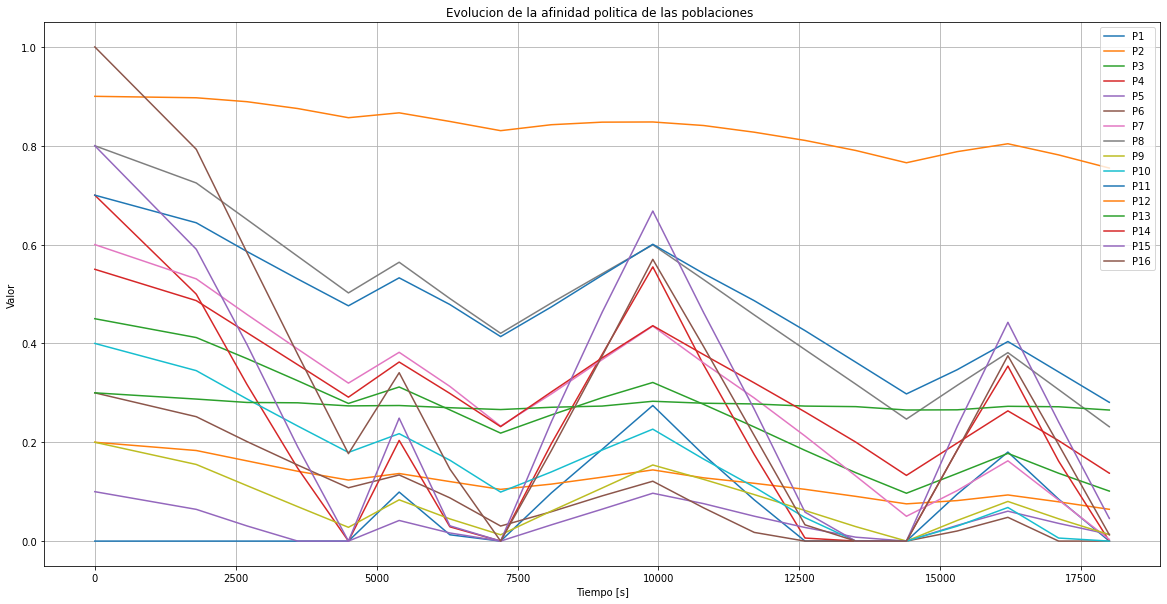

In [171]:
plt.figure(figsize=(20,10))

for i in range(1,17):
    population = salida.loc[salida['population_id'] == ' ' + str(i)]
    y_string = population[POLITICAL_AFFINITY].tolist()
    x_string = population[TIME].tolist()
    y_values = list(map(float, y_string))
    x_values = list(map(float, x_string))
    plt.plot( x_values, y_values,label='P'+str(i))

plt.grid(True)
plt.legend()
plt.xlabel('Tiempo [s]')
plt.ylabel('Valor')
plt.title('Evolucion de la afinidad politica de las poblaciones ');

Podemos observar que las poblaciones presentan modificaciones lineales y controladas a sus afinidades políticas con excepción de las poblaciones: 10, 

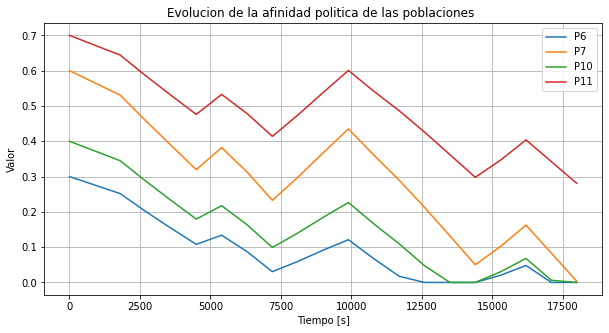

In [172]:
plt.figure(figsize=(10,5))

populations = [6,7,10,11]    #SON LAS QUE ESTAN CONECTADAS AL PUERTO DE ENTRADA!!

for i in populations:
    population = salida.loc[salida['population_id'] == ' ' + str(i)]
    y_string = population[POLITICAL_AFFINITY].tolist()
    x_string = population[TIME].tolist()
    y_values = list(map(float, y_string))
    x_values = list(map(float, x_string))
    plt.plot( x_values, y_values,label='P'+str(i))

plt.grid(True)
plt.legend()
plt.xlabel('Tiempo [s]')
plt.ylabel('Valor')
plt.title('Evolucion de la afinidad politica de las poblaciones ');

Acá mostramos la evolución de la afinidad política de las celdas que reciben las fakenews. Se puede observar que estas poblaciones evolucionan de manera similar, ya que todas reciben las noticias directamente del generador y por lo tanto las características de la fakenews (como la urgencia y la credibilidad) tiene una influencia más directa sobre la afinidad política, pero también se observan las particularidades de cada población (debido a los diferentes valores de los traits).


A continuación contrastamos la evolución de la afinidad política de las poblaciones 2 y 9. <br>


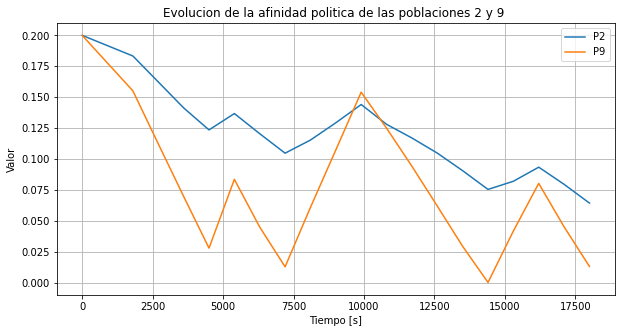

In [175]:
plt.figure(figsize=(10,5))

populations = [2,9]   
for i in populations:
    population = salida.loc[salida['population_id'] == ' ' + str(i)]
    y_string = population[POLITICAL_AFFINITY].tolist()
    x_string = population[TIME].tolist()
    y_values = list(map(float, y_string))
    x_values = list(map(float, x_string))
    plt.plot( x_values, y_values,label='P'+str(i))

plt.grid(True)
plt.legend()
plt.xlabel('Tiempo [s]')
plt.ylabel('Valor')
plt.title('Evolucion de la afinidad politica de las poblaciones 2 y 9 ');

En el gráfico de arriba podemos observar cómo las dos poblaciones comienzan con el mismo valor de afinidad al partido oficialista (0.2), pero tienen una evolución diferente de la misma debido a sus distintas características. En particular, se nota que la poblacion 9 es más influenciable al tener características como: no tener estudios universitarios, no estar muy involucrado politicamente y un estado laboral menos estable, entre otras.   <br>

[population2] 
- population_id : 2
- age : 20
- university_studies : 1
- political_involvement : 0.9
- employment_status : 0.8
- economic_status : 0.5
- political_affinity: 0.2 (inicialmente)


[population9] 
- population_id : 9
- age : 70
- university_studies : 0
- political_involvement : 0.2
- employment_status : 0.1
- economic_status : 0.8
- political_affinity: 0.2 (inicialmente)

En la celda siguiente definimos la función plotOficialistasVSOpositores que utilizaremos para comparar la proporción de poblaciones afines a los partidos oficialista y opositor a lo largo de los distintos escenarios:

In [176]:
# parsea cada fila del dataframe
def parse_value(value):
    is_list = value.strip().startswith("[") and value.strip().endswith("]")
    if is_list:
        return tuple(float(num) for num in value.replace('[', '').replace(']', '').split(', '))
    return float(value)

#conversion VTime a float
def time_to_secs(time):
    h, m, s, ms, r = time.split(':')
    return float(h)*60*60. + float(m)*60. + float(s) + float(ms)/1000. + float(r)/1000.

#conversion string to list
def value_to_list(value):
    tempValue = value[1:-1]
    return tempValue.split(',')

df_converters = {
     VALUE: parse_value,
     TIME: time_to_secs
 }


def plotOficialistasVSOpositores(OUT_FILENAME):
    # definimos los nombres de las columnas en los dataframes de pandas
    TIME_COL_ORIG = 'time_orig'
    TIME = 'time'
    PORT = 'port'
    VALUE_COL_ORIG = 'value_orig'
    VALUE = 'value'
    FAKE_ID = 'fake_id'
    ATTACKED_PARTY = 'attacked_party'
    EMITTING = 'emitting'
    FAKE_BELIEF = 'fake_belief'
    POLITICAL_AFFINITY = 'pol_affinity'
    AGE = 'age'
    UNIV_STUDIES = 'univ_studies'
    POL_INVOLVMENT ='pol_involvment'
    WORK_STATUS = 'work_status'
    ECO_STATUS = 'eco_status'
    POPULATION_ID = 'population_id'
    
    salida = pd.read_csv(OUT_FILENAME,
                         delimiter=r'(?<!,)\s+',
                         engine='python',  # C engine doesnt work for regex
                         # Se puede usar esto para convertir los valores directamente:
                         # converters=df_converters,
                         names=[TIME_COL_ORIG, PORT, VALUE_COL_ORIG]
                        )

    salida[TIME]  = salida.apply(lambda row: time_to_secs(row[TIME_COL_ORIG]), axis=1)
    salida[VALUE] = salida.apply(lambda row: value_to_list(str(row[VALUE_COL_ORIG])), axis=1)
    salida[FAKE_ID] = salida.apply(lambda row: value_to_list(str(row[VALUE_COL_ORIG]))[0], axis=1)
    salida[ATTACKED_PARTY] = salida.apply(lambda row: value_to_list(str(row[VALUE_COL_ORIG]))[1], axis=1)
    salida[EMITTING] = salida.apply(lambda row: value_to_list(str(row[VALUE_COL_ORIG]))[2], axis=1)
    salida[FAKE_BELIEF] = salida.apply(lambda row: value_to_list(str(row[VALUE_COL_ORIG]))[3], axis=1)
    salida[POLITICAL_AFFINITY] = salida.apply(lambda row: value_to_list(str(row[VALUE_COL_ORIG]))[4], axis=1)
    salida[AGE] = salida.apply(lambda row: value_to_list(str(row[VALUE_COL_ORIG]))[5], axis=1)
    salida[UNIV_STUDIES] = salida.apply(lambda row: value_to_list(str(row[VALUE_COL_ORIG]))[6], axis=1)
    salida[POL_INVOLVMENT] = salida.apply(lambda row: value_to_list(str(row[VALUE_COL_ORIG]))[7], axis=1)
    salida[WORK_STATUS] = salida.apply(lambda row: value_to_list(str(row[VALUE_COL_ORIG]))[8], axis=1)
    salida[ECO_STATUS] = salida.apply(lambda row: value_to_list(str(row[VALUE_COL_ORIG]))[9], axis=1)
    salida[POPULATION_ID] = salida.apply(lambda row: value_to_list(str(row[VALUE_COL_ORIG]))[10], axis=1)

    maxtime=salida.iloc[-1]['time']
    steps = 16

    officialist_proportion_array = []
    opposition_proportion_array = []
    time_array = []
    numberPopulations = 16

    #salida.loc[ (salida['time'] > 0) & (salida['time'] <= (i*maxtime/steps)+maxtime/steps) ]

    for i in range (1,steps):
      time_array.append(i*maxtime/steps)
      time_range_rows = salida.loc[ (salida['time'] > i*maxtime/steps) & (salida['time'] <= (i*maxtime/steps)+maxtime/steps) ]
      OffPopCount = 0


      for i in range(1,numberPopulations):
        lastPopOutput = time_range_rows.loc[salida['population_id'] == ' ' + str(i)].iloc[-1:] 
        if float(lastPopOutput['pol_affinity'].item()) > 0.5:
          OffPopCount = OffPopCount + 1

      officialist_proportion_array.append(float(OffPopCount)/numberPopulations)
      opposition_proportion_array.append(1-float(OffPopCount)/numberPopulations)

    time_array_rounded = [round(num, 1) for num in time_array]

    plt.figure(figsize=(10,5))
    plt.plot(time_array_rounded, officialist_proportion_array,marker='x',label='%oficialistas')
    plt.plot(time_array_rounded, opposition_proportion_array,marker='x',label='%opositores')

    plt.grid(True)
    plt.legend()
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Proporcion de poblaciones oficialistas  opositoras')
    plt.title('Evolucion de la proporcion de poblaciones oficialistas y opositoras');

### Evolución en cantidad de poblaciones oficialistas:

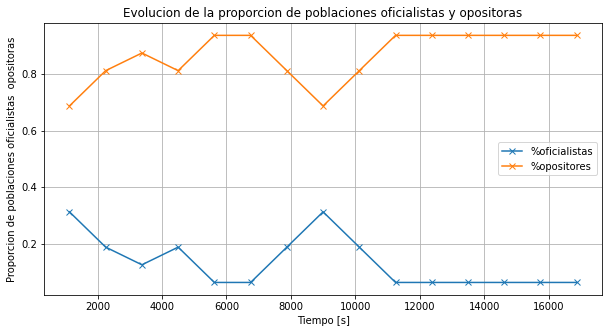

In [177]:
plotOficialistasVSOpositores('../model/fakeNewsPropagation.out')


Se observa que disminuye la cantidad de poblaciones oficialistas, lo cual era lo esperable ya que la mayoría de las fake news atacaban a aquel partido en esta primera simulación.



## Experimento 2: Fakes llegan a las cuatro celdas centrales atacando con una frecuencia de 60% al oficialismo y 40% a la oposición.
Si modificamos en el .ma el porcentaje de fake news de la siguiente manera:
-  Se emiten 40% de fake news que atacan a la oposición y 60% de las fake news atacarán al oficialismo.

Y mantenemos los siguientes valores: 

- Hay un 50% de poblaciones con estudios universitarios,
- Hay un 50% de poblaciones con un alto promedio de involucramiento político
- Hay un 50% de poblaciones con un estado laboral no precario
- Hay un 50% de poblaciones con un nivel económico no extremo

Las únicas celdas conectadas al puerto de entrada del atómico cell-DEVS serán las cuatro celdas centrales: (1,1), (1,2), (2,1) y (2,2) correspondientes a las poblaciones 6, 7, 10 y 11.


In [178]:
%%bash -s "$CDPP_EXAMPLES_CELL"

cd $1/fakeNewsPropagation-CellDEVS-master/model

# Corre el modelo
      ../src/bin/cd++    -m fakeNewsPropagation-2.ma \
                         -e fakeNewsPropagation.ev  \
                         -l fakeNewsPropagation-2.log \
                         -o fakeNewsPropagation-2.out \
                        

PCD++: A Tool to Implement n-Dimensional Cell-DEVS models
Version 3.0 - March 2003
Troccoli A., Rodriguez D., Wainer G., Barylko A., Beyoglonian J., Lopez A.
-----------------------------------------------------------------------------
PCD++ Extended States: An extended and improved version of CD++ for Cell-DEVS
Version 4.1.2 - December 2018
Santi L., Castro, R., Pimás, J.
-----------------------------------------------------------------------------
Discrete Event Simulation Lab
Departamento de Computación
Facultad de Ciencias Exactas y Naturales
Universidad de Buenos Aires, Argentina
-----------------------------------------------------------------------------
Compiled for standalone simulation


Loading models from fakeNewsPropagation-2.ma
Loading events from fakeNewsPropagation.ev
Running parallel simulation. Reading models partition from 
Model partition details output to: /dev/null*
Message log: fakeNewsPropagation-2.log
Output to: fakeNewsPropagation-2.out
Tolerance set to: 1e-08

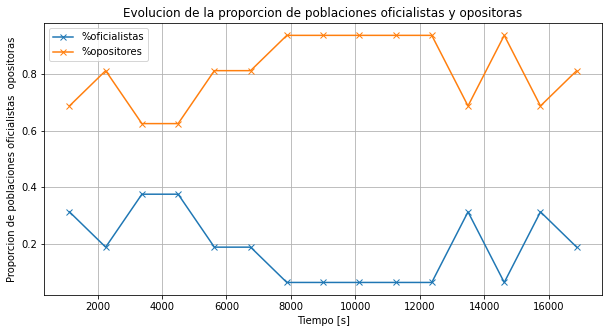

In [179]:
plotOficialistasVSOpositores('../model/fakeNewsPropagation-2.out')

Como era esperable, el porcentaje de las poblaciones afines al oficialismo disminuye, pero en una menor medida que en el experimiento anterior.

## Experimento 3: Fakes llegan a las cuatro celdas centrales atacando con una frecuencia del 60% al oficialismo y 40% a la oposición. Se modifican las características de las poblaciones de manera de hacerlas más influenciables.

Si en cambio modificamos en el .ma las características de la población de la siguiente manera:


- Hay un 25% de poblaciones con estudios universitarios,
- Hay un 25% de poblaciones con un alto promedio de involucramiento político
- Hay un 25% de poblaciones con un estado laboral no precario
- Hay un 25% de poblaciones con un nivel económico no extremo

Y mantenemos los siguientes valores: 

-  Se emiten 40% de fake news que atacan a la oposición y 60% de las fake news atacarán al oficialismo.

Las únicas celdas conectadas al puerto de entrada del atómico cell-DEVS serán las cuatro celdas centrales: (1,1), (1,2), (2,1) y (2,2) correspondientes a las poblaciones 6, 7, 10 y 11.


In [180]:
%%bash -s "$CDPP_EXAMPLES_CELL"

cd $1/fakeNewsPropagation-CellDEVS-master/model

# Corre el modelo
      ../src/bin/cd++    -m fakeNewsPropagation-3.ma \
                         -e fakeNewsPropagation.ev  \
                         -l fakeNewsPropagation-3.log \
                         -o fakeNewsPropagation-3.out \
                        

PCD++: A Tool to Implement n-Dimensional Cell-DEVS models
Version 3.0 - March 2003
Troccoli A., Rodriguez D., Wainer G., Barylko A., Beyoglonian J., Lopez A.
-----------------------------------------------------------------------------
PCD++ Extended States: An extended and improved version of CD++ for Cell-DEVS
Version 4.1.2 - December 2018
Santi L., Castro, R., Pimás, J.
-----------------------------------------------------------------------------
Discrete Event Simulation Lab
Departamento de Computación
Facultad de Ciencias Exactas y Naturales
Universidad de Buenos Aires, Argentina
-----------------------------------------------------------------------------
Compiled for standalone simulation


Loading models from fakeNewsPropagation-3.ma
Loading events from fakeNewsPropagation.ev
Running parallel simulation. Reading models partition from 
Model partition details output to: /dev/null*
Message log: fakeNewsPropagation-3.log
Output to: fakeNewsPropagation-3.out
Tolerance set to: 1e-08

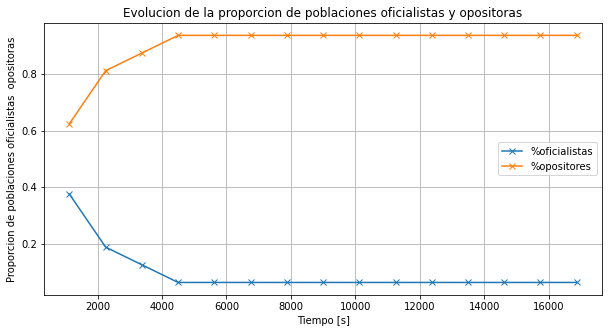

In [181]:
plotOficialistasVSOpositores('../model/fakeNewsPropagation-3.out')

Acá es importante percartarse de que aunque la proporción de las fake news sea 40-60, la afinidad política de las poblaciones se vuelve mucho mas distanciada, seguramente debido a las características de los mismos. Bajos porcentajes de estudios universitarios, involucramiento político, y estar en un estado laboral precario y en un extremo económico, conllevan una gran polarización de la sociedad.

## Experimento 4: Fakes llegan a las cuatro celdas de los bordes atacando con una frecuencia del 60% al oficialismo y 40% a la oposición.
Ahora nos interesa ver qué sucede cuando las celdas de las esquinas son aquellas que están conectadas al puerto de entrada del atómico cell-DEVS y comparar la evolución de la afinidad política de las poblaciones con el caso de la recepción por parte de las celdas centrales.

El porcentaje de fake news continúa de la siguiente manera:
-  Se emiten 40% de fake news que atacan a la oposición y 60% de las fake news atacarán al oficialismo.

Y mantenemos los siguientes valores: 

- Hay un 50% de poblaciones con estudios universitarios,
- Hay un 50% de poblaciones con un alto promedio de involucramiento político
- Hay un 50% de poblaciones con un estado laboral no precario
- Hay un 50% de poblaciones con un nivel económico no extremo

Las únicas celdas conectadas al puerto de entrada del atómico cell-DEVS serán las cuatro celdas centrales: (0,0), (0,3), (3,0) y (3,3) correspondientes a las poblaciones 1, 4, 13 y 16.


In [183]:
%%bash -s "$CDPP_EXAMPLES_CELL"

cd $1/fakeNewsPropagation-CellDEVS-master/model

# Corre el modelo
      ../src/bin/cd++    -m fakeNewsPropagation-4.ma \
                         -e fakeNewsPropagation.ev  \
                         -l fakeNewsPropagation-4.log \
                         -o fakeNewsPropagation-4.out \
                        

PCD++: A Tool to Implement n-Dimensional Cell-DEVS models
Version 3.0 - March 2003
Troccoli A., Rodriguez D., Wainer G., Barylko A., Beyoglonian J., Lopez A.
-----------------------------------------------------------------------------
PCD++ Extended States: An extended and improved version of CD++ for Cell-DEVS
Version 4.1.2 - December 2018
Santi L., Castro, R., Pimás, J.
-----------------------------------------------------------------------------
Discrete Event Simulation Lab
Departamento de Computación
Facultad de Ciencias Exactas y Naturales
Universidad de Buenos Aires, Argentina
-----------------------------------------------------------------------------
Compiled for standalone simulation


Loading models from fakeNewsPropagation-4.ma
Loading events from fakeNewsPropagation.ev
Running parallel simulation. Reading models partition from 
Model partition details output to: /dev/null*
Message log: fakeNewsPropagation-4.log
Output to: fakeNewsPropagation-4.out
Tolerance set to: 1e-08

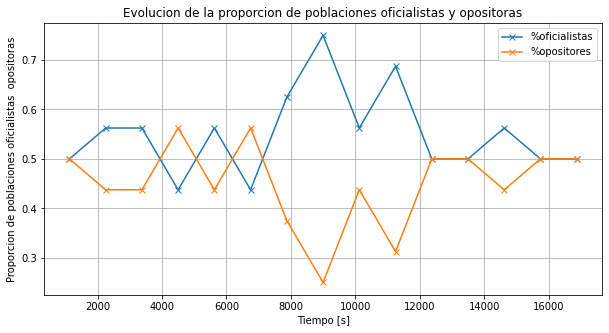

In [184]:
plotOficialistasVSOpositores('../model/fakeNewsPropagation-4.out')

En este caso, se observa una menor influencia de las fakenews que en el primer experimento, pudiendo atribuirse esta situación a que las celdas de los bordes tienen menor centralidad y por lo tanto dispersan en menor medida las fakenews.

## Experimento 5: Fakes llegan a todas las celdas atacando con una frecuencia del 60% al oficialismo y 40% a la oposición.
Ahora nos interesa ver qué sucede cuando todas las celdas están conectadas al puerto de entrada del atómico cell-DEVS y comparar la evolución de la afinidad política de las poblaciones con el caso de la recepción por parte de las celdas centrales y de las celdas de los bordes.

El porcentaje de fake news continúa de la siguiente manera:
-  Se emiten 40% de fake news que atacan a la oposición y 60% de las fake news atacarán al oficialismo.

Y mantenemos los siguientes valores: 

- Hay un 50% de poblaciones con estudios universitarios,
- Hay un 50% de poblaciones con un alto promedio de involucramiento político
- Hay un 50% de poblaciones con un estado laboral no precario
- Hay un 50% de poblaciones con un nivel económico no extremo



In [186]:

%%bash -s "$CDPP_EXAMPLES_CELL"

cd $1/fakeNewsPropagation-CellDEVS-master/model

# Corre el modelo
      ../src/bin/cd++    -m fakeNewsPropagation-5.ma \
                         -e fakeNewsPropagation.ev  \
                         -l fakeNewsPropagation-5.log \
                         -o fakeNewsPropagation-5.out \
                        

PCD++: A Tool to Implement n-Dimensional Cell-DEVS models
Version 3.0 - March 2003
Troccoli A., Rodriguez D., Wainer G., Barylko A., Beyoglonian J., Lopez A.
-----------------------------------------------------------------------------
PCD++ Extended States: An extended and improved version of CD++ for Cell-DEVS
Version 4.1.2 - December 2018
Santi L., Castro, R., Pimás, J.
-----------------------------------------------------------------------------
Discrete Event Simulation Lab
Departamento de Computación
Facultad de Ciencias Exactas y Naturales
Universidad de Buenos Aires, Argentina
-----------------------------------------------------------------------------
Compiled for standalone simulation


Loading models from fakeNewsPropagation-5.ma
Loading events from fakeNewsPropagation.ev
Running parallel simulation. Reading models partition from 
Model partition details output to: /dev/null*
Message log: fakeNewsPropagation-5.log
Output to: fakeNewsPropagation-5.out
Tolerance set to: 1e-08

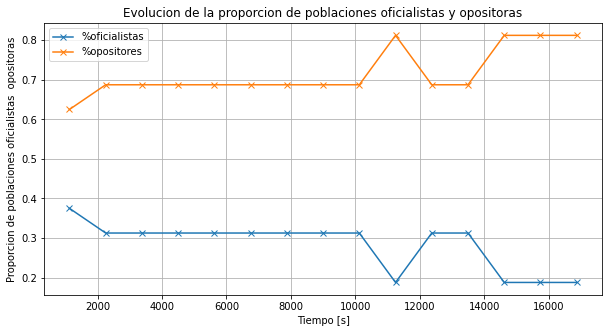

In [187]:
plotOficialistasVSOpositores('../model/fakeNewsPropagation-5.out')

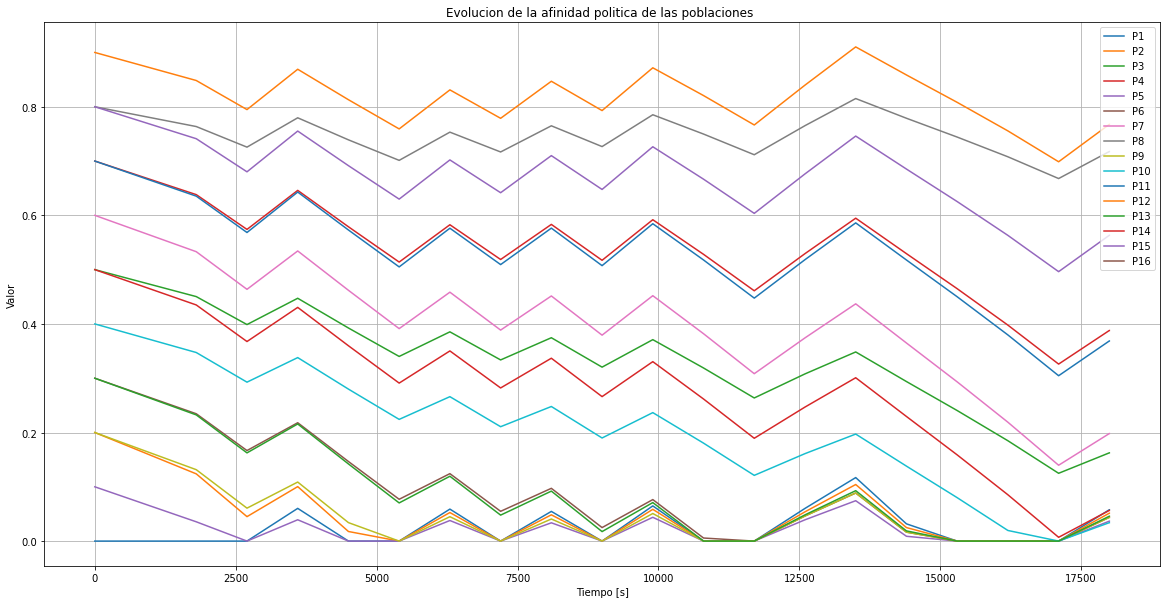

In [188]:
OUT_FILENAME = '../model/fakeNewsPropagation-5.out'

#[id_fake,attacked_party, emitiendo, creencia, afinidad pol, edad, est univ, invol polit, est lab, nivel econ]

# definimos los nombres de las columnas en los dataframes de pandas
TIME_COL_ORIG = 'time_orig'
TIME = 'time'
PORT = 'port'
VALUE_COL_ORIG = 'value_orig'
VALUE = 'value'
FAKE_ID = 'fake_id'
ATTACKED_PARTY = 'attacked_party'
EMITTING = 'emitting'
FAKE_BELIEF = 'fake_belief'
POLITICAL_AFFINITY = 'pol_affinity'
AGE = 'age'
UNIV_STUDIES = 'univ_studies'
POL_INVOLVMENT ='pol_involvment'
WORK_STATUS = 'work_status'
ECO_STATUS = 'eco_status'
POPULATION_ID = 'population_id'


# parsea cada fila del dataframe
def parse_value(value):
    is_list = value.strip().startswith("[") and value.strip().endswith("]")
    if is_list:
        return tuple(float(num) for num in value.replace('[', '').replace(']', '').split(', '))
    return float(value)

#conversion VTime a float
def time_to_secs(time):
    h, m, s, ms, r = time.split(':')
    return float(h)*60*60. + float(m)*60. + float(s) + float(ms)/1000. + float(r)/1000.

#conversion string to list
def value_to_list(value):
    tempValue = value[1:-1]
    return tempValue.split(',')

df_converters = {
     VALUE: parse_value,
     TIME: time_to_secs
 }

salida = pd.read_csv(OUT_FILENAME,
                     delimiter=r'(?<!,)\s+',
                     engine='python',  # C engine doesnt work for regex
                     # Se puede usar esto para convertir los valores directamente:
                     # converters=df_converters,
                     names=[TIME_COL_ORIG, PORT, VALUE_COL_ORIG]
                    )

salida[TIME]  = salida.apply(lambda row: time_to_secs(row[TIME_COL_ORIG]), axis=1)
salida[VALUE] = salida.apply(lambda row: value_to_list(str(row[VALUE_COL_ORIG])), axis=1)
salida[FAKE_ID] = salida.apply(lambda row: value_to_list(str(row[VALUE_COL_ORIG]))[0], axis=1)
salida[ATTACKED_PARTY] = salida.apply(lambda row: value_to_list(str(row[VALUE_COL_ORIG]))[1], axis=1)
salida[EMITTING] = salida.apply(lambda row: value_to_list(str(row[VALUE_COL_ORIG]))[2], axis=1)
salida[FAKE_BELIEF] = salida.apply(lambda row: value_to_list(str(row[VALUE_COL_ORIG]))[3], axis=1)
salida[POLITICAL_AFFINITY] = salida.apply(lambda row: value_to_list(str(row[VALUE_COL_ORIG]))[4], axis=1)
salida[AGE] = salida.apply(lambda row: value_to_list(str(row[VALUE_COL_ORIG]))[5], axis=1)
salida[UNIV_STUDIES] = salida.apply(lambda row: value_to_list(str(row[VALUE_COL_ORIG]))[6], axis=1)
salida[POL_INVOLVMENT] = salida.apply(lambda row: value_to_list(str(row[VALUE_COL_ORIG]))[7], axis=1)
salida[WORK_STATUS] = salida.apply(lambda row: value_to_list(str(row[VALUE_COL_ORIG]))[8], axis=1)
salida[ECO_STATUS] = salida.apply(lambda row: value_to_list(str(row[VALUE_COL_ORIG]))[9], axis=1)
salida[POPULATION_ID] = salida.apply(lambda row: value_to_list(str(row[VALUE_COL_ORIG]))[10], axis=1)

plt.figure(figsize=(20,10))

for i in range(1,17):
    population = salida.loc[salida['population_id'] == ' ' + str(i)]
    y_string = population[POLITICAL_AFFINITY].tolist()
    x_string = population[TIME].tolist()
    y_values = list(map(float, y_string))
    x_values = list(map(float, x_string))
    plt.plot( x_values, y_values,label='P'+str(i))

plt.grid(True)
plt.legend()
plt.xlabel('Tiempo [s]')
plt.ylabel('Valor')
plt.title('Evolucion de la afinidad politica de las poblaciones ');

Acá observamos que si todas las poblaciones consumen las fakenews, su comportamiento es más similar, ya que su afinidad política estará más influenciada por esta recepción y en menor medida por las opiniones de los vecinos. Lo cual tiene sentido, ya que si más personas consumen medios de comunicación, la población resulta ser más influenciable por los mismos.

## Conclusiones 

Pudimos construir un modelo que muestra como influye la dispersión de noticias falsas en las afinidades políticas de una sociedad que está integrada por poblaciones con distintas características.

Se propone como una mejora, aumentar la diversidad de grupos sociales y estudiar con mayor profundidad las hipótesis que influyen para modificar la afinidad hacia un partido político, en función de noticias escuchadas y la influencia de otros grupos de la sociedad para modelar de una manera más real estos comportamientos sociales.


Pudimos comparar el modelado y simulación de la dispersión de fakenews en una sociedad utilizando el formalismo DEVS y cell-DEVS. En el primer caso nos resultó mucho más complejo el hecho de las interconexiones entre poblaciones. Sin embargo en este trabajo nos resultó ineficiente el hecho de tener que definir reglas y macros particulares para cada vecino, además la escritura de las mismas resulta poco declarativa cuando el grado de complejidad de las cuentas aumenta. 

Con respecto a la cantidad de poblaciones, en el primer trabajo encontramos una limitación, ya que se deben definir manualmente las mismas y sus interconexiones, en cambio utilizando cell-DEVS esto resulta más escalable, ya que la cantidad de reglas no depende de la cantidad de poblaciones.

[REVISION] A esto útltimo le agregaría "...debido a que decidimos asignar diferentes poblaciones a diferentes celdas, y en Cell-DEVS la estructuración del espacio de celdas es resuelto automáticamente por el intérprete de Cell-DEVS."